<h1 align="center">Снижение размерности данных</h1>

In [1]:
# подключение библиотек
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

1. Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [2]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [3]:
# Загрузим игрушечный датасет из sklearn
iris = load_iris()
X = iris.data
X.shape

(150, 4)

In [4]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = min_max_scale(X)

In [5]:
X[:10]

array([[0.64102564, 0.43589744, 0.16666667, 0.01282051],
       [0.61538462, 0.37179487, 0.16666667, 0.01282051],
       [0.58974359, 0.3974359 , 0.15384615, 0.01282051],
       [0.57692308, 0.38461538, 0.17948718, 0.01282051],
       [0.62820513, 0.44871795, 0.16666667, 0.01282051],
       [0.67948718, 0.48717949, 0.20512821, 0.03846154],
       [0.57692308, 0.42307692, 0.16666667, 0.02564103],
       [0.62820513, 0.42307692, 0.17948718, 0.01282051],
       [0.55128205, 0.35897436, 0.16666667, 0.01282051],
       [0.61538462, 0.38461538, 0.17948718, 0.        ]])

In [6]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(144.587473131409, array([0.75548199, 0.37569223, 0.5125855 , 0.15924327]))
(5.214163775155568, array([ 0.28638851,  0.54022096, -0.70869475, -0.35198677]))
(0.1982763943867142, array([ 0.49117064, -0.68368641, -0.05604693, -0.53682683]))
(0.0584364689369822, array([ 0.32554568, -0.31557813, -0.48152529,  0.75004256]))


In [7]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[96.35416713107354, 3.4747575080969457, 0.13213286344329886, 0.03894249738624572]
Кумулятивная доля дисперсии по компонентам 
[ 96.35416713  99.82892464  99.9610575  100.        ]


In [8]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.75548199  0.28638851]
 [ 0.37569223  0.54022096]
 [ 0.5125855  -0.70869475]
 [ 0.15924327 -0.35198677]]


In [9]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [10]:
Z[:10]

array([[0.7355191 , 0.29643487],
       [0.69206493, 0.25446202],
       [0.67575513, 0.27005638],
       [0.67439611, 0.24128716],
       [0.73065   , 0.29968913],
       [0.80764036, 0.29887066],
       [0.68431578, 0.26663807],
       [0.72758848, 0.27675148],
       [0.63882003, 0.22917788],
       [0.70141153, 0.25681475]])

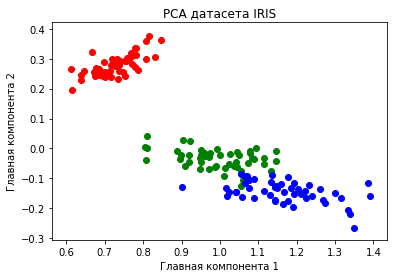

In [11]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Обучим и оценим базовую модель KNN на исходных данных

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
KNN_initial_model = KNeighborsClassifier(5)
KNN_initial_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_initial_pred = KNN_initial_model.predict(X_test)

In [15]:
f1_score(y_test, y_initial_pred, average='weighted')

0.98

Обучим и оценим базовую модель KNN на данных после применения PCA

In [16]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.33, random_state=42)

In [17]:
KNN_PCA_model = KNeighborsClassifier(5)
KNN_PCA_model.fit(Z_train, y_train)

KNeighborsClassifier()

In [18]:
y_PCA_pred = KNN_PCA_model.predict(Z_test)

In [19]:
f1_score(y_test, y_PCA_pred, average='weighted')

1.0